In [202]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import comb

In [92]:
s = np.random.poisson(1, 10000)

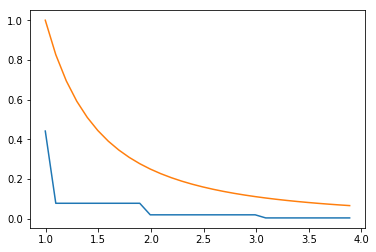

In [93]:
def compare_markov(s, t):
    P1 = np.mean(s >= t)
    P2 = s.mean() / t
    return P1, P2

def compare_chebychev(s, t):
    mu = s.mean()
    P1 = np.mean(np.abs(mu - s) >= t)
    P2 = s.var() / (t*t)
    return P1, P2

mu = s.mean()
std = s.std()
domain = np.arange(std, 4*std, std/10)
pairs = [compare_chebychev(s, t) for t in domain]
P1s = [p[0] for p in pairs]
P2s = [p[1] for p in pairs]
plt.plot(domain, P1s)
plt.plot(domain, P2s)
plt.show()

In [97]:
v = np.random.randn(100)
v = v / np.abs(v)
v

array([ 1.,  1., -1., -1.,  1., -1.,  1.,  1.,  1., -1.,  1.,  1., -1.,
       -1., -1., -1., -1.,  1., -1., -1., -1.,  1., -1.,  1., -1.,  1.,
       -1., -1., -1.,  1., -1., -1.,  1.,  1.,  1., -1., -1., -1.,  1.,
       -1., -1., -1.,  1.,  1., -1.,  1., -1., -1.,  1.,  1.,  1., -1.,
        1., -1.,  1.,  1.,  1.,  1., -1., -1., -1.,  1., -1.,  1., -1.,
        1., -1.,  1.,  1., -1.,  1.,  1., -1., -1., -1., -1.,  1., -1.,
        1., -1., -1.,  1., -1., -1., -1., -1.,  1.,  1., -1., -1.,  1.,
       -1., -1., -1., -1.,  1., -1.,  1., -1.,  1.])

In [99]:
def get_exp(lmbda, C):
    s = np.random.randn(C)
    s = s / np.abs(s)
    s = np.exp(lmbda*s)
    return s.mean()

In [119]:
get_exp(lmbda=5, C=10000)

74.49192072498344

In [129]:
bnd

array([2.68337287e+05, 2.98095799e+03, 9.00171313e+01, 7.38905610e+00,
       1.64872127e+00, 1.00000000e+00, 1.64872127e+00, 7.38905610e+00,
       9.00171313e+01, 2.98095799e+03, 2.68337287e+05])

In [143]:
np.min([bnd1, bnd2], 0).shape

(60,)

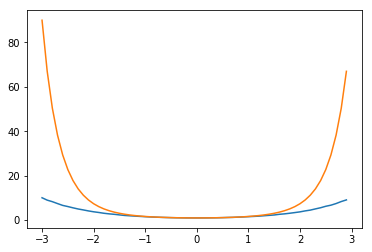

In [155]:
domain = np.arange(-3, 3, 0.1)
res = [get_exp(i, 10000) for i in domain]
bnd = np.exp(domain**2 / 2)
# bnd2 = 0.5 * np.exp(domain) + 0.5 * np.exp(-domain)
plt.plot(domain, res)
plt.plot(domain, bnd)
plt.show()

In [157]:
np.random.binomial(5, 0.5, size=C)

3

In [162]:
def get_samp(t, n, C):
    s = np.random.binomial(n, 0.5, size=C)
    s = 2*s - n
    return (s >= t).mean()

In [181]:
get_samp(10, 100, 100000)

0.18415

In [216]:
n = 25
std = np.sqrt(n)
domain = np.arange(0, 5*std)
res = [get_samp(t, n, 1000000) for t in domain]
ubnd = np.exp(-domain**2 / (2*n))
lbnd = n*np.log(2) - np.log(comb(n, np.ceil((domain+n)/2)))

/home/keller/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


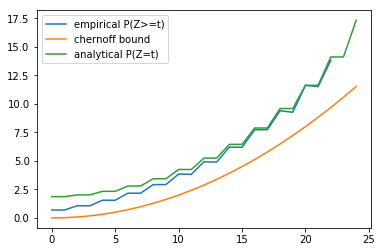

In [218]:
plt.plot(domain, -np.log(res), label="empirical P(Z>=t)")
plt.plot(domain, -np.log(ubnd), label="chernoff bound")
plt.plot(domain, lbnd, label="analytical P(Z=t)")
plt.legend()
plt.show()

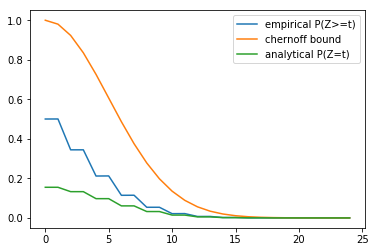

In [233]:
plt.plot(domain, res, label="empirical P(Z>=t)")
plt.plot(domain, ubnd, label="chernoff bound")
plt.plot(domain, np.exp(-lbnd), label="analytical P(Z=t)")
plt.legend()
plt.show()

In [193]:
delta = 0.1
np.sqrt(2*np.log(1/delta))

2.145966026289347

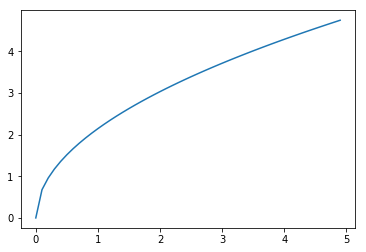

In [232]:
order = np.arange(0, 5, 0.1)
delta = 10.**-order
plt.plot(order, np.sqrt(2*np.log(1/delta)))
plt.show()

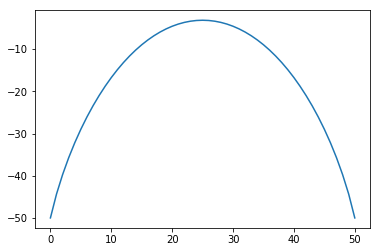

In [229]:
n = 50
c = np.array([comb(n, i) for i in range(n+1)])
plt.plot(np.log2(c) - n)
plt.show()